In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [4]:
with open('Data/Data12/RF_result_12I1O.pkl', 'rb') as f:
    result = pickle.load(f)

In [5]:
result

[(0,
  'randomforestregressor',
  ['Input 08',
   'Input 09',
   'Input 01',
   'Input 03',
   'Input 06',
   'Input 07',
   'Input 11',
   'Input 04',
   'Input 10',
   'Input 02',
   'Input 05',
   'Input 12'],
  {'r2': 0.8447922999521216,
   'neg_root_mean_squared_error': -0.049480411923112165,
   'total_zeros': 7203}),
 (1,
  'randomforestregressor',
  ['Input 08',
   'Input 01',
   'Input 06',
   'Input 03',
   'Input 12',
   'Input 09',
   'Input 11',
   'Input 10',
   'Input 04',
   'Input 05',
   'Input 07',
   'Input 02'],
  {'r2': 0.877309822156402,
   'neg_root_mean_squared_error': -0.0389974404265591,
   'total_zeros': 4279}),
 (2,
  'randomforestregressor',
  ['Input 08',
   'Input 01',
   'Input 06',
   'Input 03',
   'Input 05',
   'Input 09',
   'Input 12',
   'Input 11',
   'Input 04',
   'Input 02',
   'Input 07',
   'Input 10'],
  {'r2': 0.891913854838603,
   'neg_root_mean_squared_error': -0.03648539188521682,
   'total_zeros': 3008}),
 (3,
  'randomforestregressor'

In [6]:
df_r = pd.DataFrame(result)
df_r

,0,1,2,3
0,0,randomforestregressor,"[Input 08, Input 09, Input 01, Input 03, Input 06, Input 07, Input 11, Input 04, Input 10, Input 02, Input 05, Input 12]","{'r2': 0.8447922999521216, 'neg_root_mean_squared_error': -0.049480411923112165, 'total_zeros': 7203}"
1,1,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 12, Input 09, Input 11, Input 10, Input 04, Input 05, Input 07, Input 02]","{'r2': 0.877309822156402, 'neg_root_mean_squared_error': -0.0389974404265591, 'total_zeros': 4279}"
2,2,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 05, Input 09, Input 12, Input 11, Input 04, Input 02, Input 07, Input 10]","{'r2': 0.891913854838603, 'neg_root_mean_squared_error': -0.03648539188521682, 'total_zeros': 3008}"
3,3,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8929569340731659, 'neg_root_mean_squared_error': -0.03653132679809976, 'total_zeros': 4073}"
4,4,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8941910620184963, 'neg_root_mean_squared_error': -0.03633361227340141, 'total_zeros': 3418}"
...,...,...,...,...
6,6,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8941910620184963, 'neg_root_mean_squared_error': -0.03633361227340141, 'total_zeros': 3418}"
7,7,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8941910620184963, 'neg_root_mean_squared_error': -0.03633361227340141, 'total_zeros': 3418}"
8,8,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8941910620184963, 'neg_root_mean_squared_error': -0.03633361227340141, 'total_zeros': 3418}"
9,9,randomforestregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 05, Input 12, Input 11, Input 07, Input 04, Input 02, Input 10]","{'r2': 0.8941910620184963, 'neg_root_mean_squared_error': -0.03633361227340141, 'total_zeros': 3418}"


In [7]:
r2 = df_r[3].apply(pd.Series)
r2

,r2,neg_root_mean_squared_error,total_zeros
0,0.844792,-0.049480,7203.0
1,0.877310,-0.038997,4279.0
2,0.891914,-0.036485,3008.0
3,0.892957,-0.036531,4073.0
4,0.894191,-0.036334,3418.0
...,...,...,...
6,0.894191,-0.036334,3418.0
7,0.894191,-0.036334,3418.0
8,0.894191,-0.036334,3418.0
9,0.894191,-0.036334,3418.0


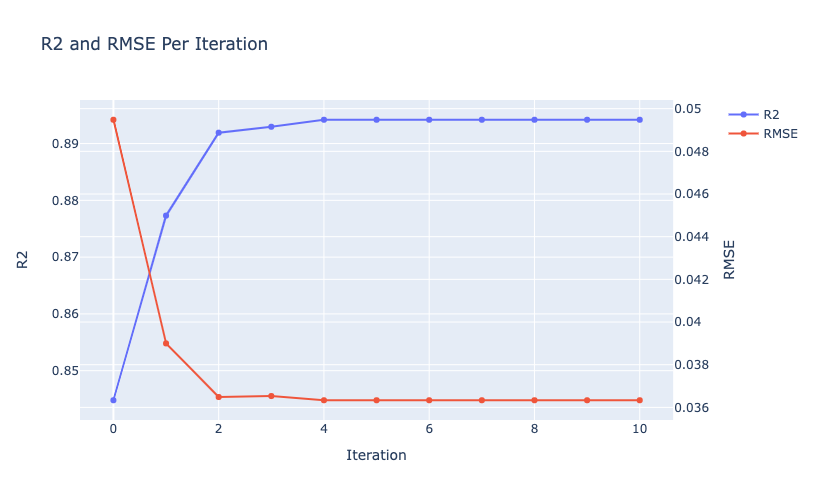

In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(y =  r2.r2, x = r2.index, name = "R2"),  secondary_y=False)
fig.add_trace(go.Scatter(y =  r2.neg_root_mean_squared_error * -1, x = r2.index, name = "RMSE"), secondary_y=True)


fig.update_layout(title="R2 and RMSE Per Iteration",
                    xaxis_title='Iteration',
                    yaxis_title='R2',
                    yaxis2_title='RMSE',
                   autosize=False,
                   width=900,
                  height=500,
                 )
fig.update_layout(title_text = "R2 and RMSE Per Iteration")

fig.show()

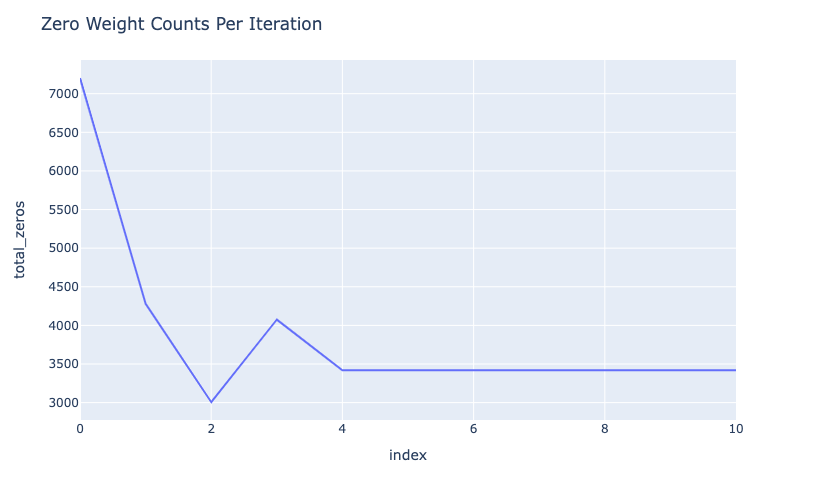

In [9]:
fig = px.line(r2, x=r2.index, y=r2.total_zeros)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Weight Counts Per Iteration",
)

fig.show()

In [10]:
df_imp = pd.read_pickle('Data/Data12/RF_12I1O_df_imp.pkl')
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Output 01,0.742394,Output 01,0,0
1,Input 08,0.042123,Input 08,428,0
2,Input 09,0.035544,Input 09,599,0
3,Input 01,0.032683,Input 01,330,0
4,Input 03,0.029812,Input 03,249,0
...,...,...,...,...,...
138,Input 11,0.005850,Input 11,319,10
139,Input 07,0.005560,Input 07,352,10
140,Input 04,0.005479,Input 04,502,10
141,Input 02,0.005048,Input 02,831,10


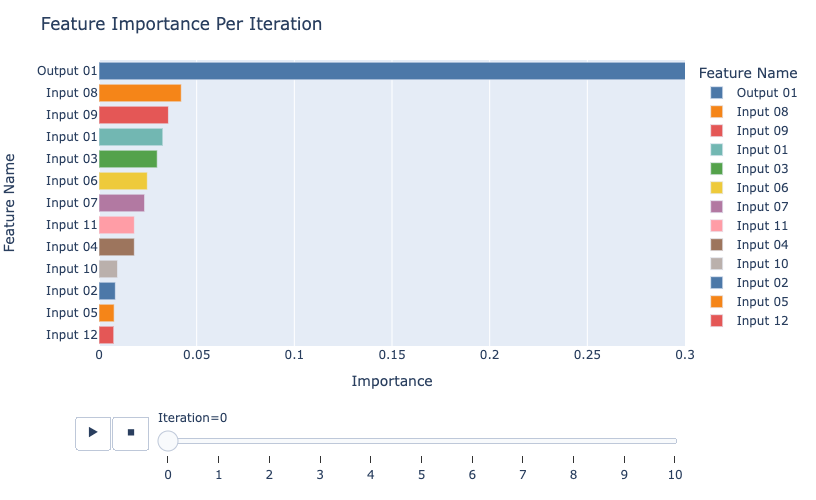

In [11]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)


fig.show()

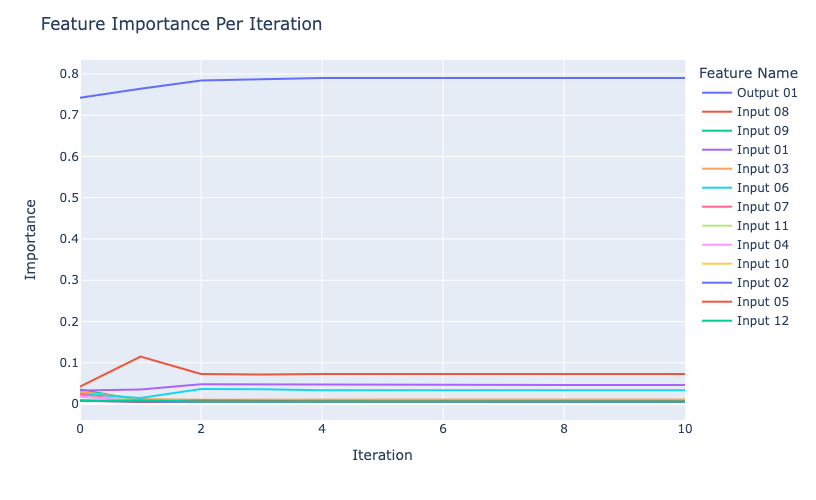

In [12]:
fig = px.line(df_imp, x='Iteration', y="Importance", color = "Feature Name")

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)

fig.show()